In [2]:
import numpy as np
from scipy.signal import correlate
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import zscore
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster
from matplotlib.colors import ListedColormap
from cross_crorrelation import *
from sklearn.preprocessing import MinMaxScaler,RobustScaler,QuantileTransformer,StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

## FUNCTIONS 

In [3]:
from scipy.stats import ks_2samp

def compare_distributions(df1, df2):
    results = {}
    for column in df1.columns:
        if column in df2.columns:  # Ensure the column exists in both dataframes
            stat, p_value = ks_2samp(df1[column].dropna(), df2[column].dropna())
            results[column] = {'KS Statistic': stat, 'P-Value': p_value}
    return results

In [4]:
def bhattacharyya_distance(data1, data2, bins=9, range=[0,1]):
    """
    Calculate the Bhattacharyya Distance between two data sets.

    Parameters:
    - data1, data2: Arrays of data points.
    - bins: Number of histogram bins.
    - range: The lower and upper range of the bins.

    Returns:
    - Bhattacharyya Distance between the two distributions.
    """
    # Calculate histograms
    hist1, _ = np.histogram(data1, bins=bins, range=range, density=True)
    hist2, _ = np.histogram(data2, bins=bins, range=range, density=True)

    # Normalize histograms
    hist1 = hist1 / np.sum(hist1)
    hist2 = hist2 / np.sum(hist2)

    # Calculate the Bhattacharyya coefficient
    bc = np.sum(np.sqrt(hist1 * hist2))

    # Calculate Bhattacharyya distance
    distance = -np.log(bc)

    return distance

In [5]:

def cosine_similarity_matrix(df1, df2):
    """
    Calculate cosine similarity between corresponding columns of two dataframes.

    Parameters:
    - df1, df2: Pandas DataFrames with the same structure, where each column is a sample.

    Returns:
    - DataFrame with cosine similarity values for corresponding columns.
    """
    # Ensure the dataframes have the same columns
    assert df1.columns.equals(df2.columns), "DataFrames must have the same columns"
    
    # Initialize a dictionary to store cosine similarity values
    cosine_similarities = {}

    # Iterate over the columns
    for column in df1.columns:
        # Reshape the columns to 2D arrays suitable for sklearn's cosine_similarity function
        vector1 = df1[column].values.reshape(1, -1)
        vector2 = df2[column].values.reshape(1, -1)

        # Compute cosine similarity and store the value
        cos_sim = cosine_similarity(vector1, vector2)[0, 0]
        cosine_similarities[column] = cos_sim

    # Convert the dictionary to a DataFrame
    cosine_similarity_df = pd.DataFrame(list(cosine_similarities.items()), columns=['Column', 'Cosine Similarity'])
    
    return cosine_similarity_df

## CROSS CORR

In [6]:

paired_df = pd.read_csv("data/DatasetClusters/fishes/fish02/fish_02_pairs.csv")

In [7]:
z_scores,cross_corr_df = create_z_score_df(paired_df,11)
cross_corr_df

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,0.010815,0.237826,0.110872,0.000501,0.092582,0.176504,-0.250984,0.226399,-0.149266,-0.100942,...,-0.000063,-0.079705,0.021991,0.032751,0.066251,-0.066833,-0.046880,-0.013910,0.005487,-0.079188
1,-0.013288,0.152906,0.177438,0.034770,0.060869,-0.084108,-0.244105,0.168515,-0.164675,-0.163912,...,0.008933,-0.055099,0.059704,0.005293,0.086858,0.013159,-0.041347,0.030416,0.030531,-0.054543
2,0.022333,0.114677,0.350201,0.183654,0.082606,-0.252887,-0.105069,0.176171,-0.113276,-0.180813,...,0.057086,-0.049374,0.050085,0.023651,0.102254,0.059517,0.023068,0.080454,0.024287,-0.002920
3,0.055199,0.136916,0.518293,0.323001,0.120624,-0.249097,0.116836,0.277823,-0.028496,-0.073674,...,0.079969,-0.017816,0.084322,0.071344,0.138758,0.074370,0.026034,0.143792,0.053047,-0.011205
4,0.081143,0.278546,0.619860,0.557667,0.212536,0.061897,0.327629,0.423233,0.029589,0.200836,...,0.060262,0.001283,0.114917,0.079047,0.154008,0.079148,0.023879,0.157459,0.072785,-0.085976
5,0.069081,0.274125,0.470024,0.448173,0.158472,0.213392,0.318945,0.475558,-0.036462,0.279716,...,0.034556,-0.043245,0.085258,0.055636,0.138484,0.062049,0.002523,0.117424,0.032791,-0.088165
6,0.036834,0.228652,0.327488,0.349974,0.076908,0.188880,0.217712,0.442956,-0.081337,0.266176,...,-0.041976,-0.087830,0.072424,0.015724,0.124360,-0.035153,-0.031857,0.098059,0.023042,-0.110416
7,-0.048754,0.130227,0.235358,0.223838,0.024994,-0.039577,0.022443,0.353645,-0.110064,0.100896,...,-0.052449,-0.096813,0.068463,-0.043753,0.122750,-0.064307,0.003482,0.052749,0.003185,-0.081689
8,-0.120912,0.052748,0.243220,0.155853,0.027920,-0.202294,-0.051658,0.273705,-0.165431,-0.016459,...,-0.020096,-0.096268,0.091991,0.005063,0.116776,-0.017017,0.013515,0.050643,0.066873,-0.102159


# ATTN WEIGHTS

In [27]:
# REC 1
REC_INDEPENDENT_1_HEAD_ENC9_DEC9_COMBINED_DEC = pd.read_csv("data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_1_HEAD_ENC9_DEC9_COMBINED_DEC.csv")
REC_INDEPENDENT_1_HEAD_ENC9_DEC9_COMBINED_ENC = pd.read_csv("data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_1_HEAD_ENC9_DEC9_COMBINED_ENC.csv")

# REC 2
REC_INDEPENDENT_1_HEAD_ENC9_DEC9_DEC =   pd.read_csv("data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_1_HEAD_ENC9_DEC9_DEC.csv")
REC_INDEPENDENT_1_HEAD_ENC9_DEC9_ENC =   pd.read_csv("data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_1_HEAD_ENC9_DEC9_ENC.csv")

# REC 3
REC_INDEPENDENT_1_HEAD_ENC104_DEC9_COMBINED_DEC =  pd.read_csv("data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_1_HEAD_ENC104_DEC9_COMBINED_DEC.csv")
REC_INDEPENDENT_1_HEAD_ENC104_DEC9_COMBINED_ENC =  pd.read_csv("data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_1_HEAD_ENC104_DEC9_COMBINED_ENC.csv")

# REC 4
REC_INDEPENDENT_4_HEAD_ENC9_DEC9_COMBINED_DEC =   pd.read_csv("data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_4_HEAD_ENC9_DEC9_COMBINED_DEC.csv")
REC_INDEPENDENT_4_HEAD_ENC9_DEC9_COMBINED_ENC =   pd.read_csv("data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_4_HEAD_ENC9_DEC9_COMBINED_ENC.csv")

# REC 5
REC_INDEPENDENT_4_HEAD_ENC9_DEC9_DEC =   pd.read_csv("data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_4_HEAD_ENC9_DEC9_DEC.csv")
REC_INDEPENDENT_4_HEAD_ENC9_DEC9_ENC =   pd.read_csv("data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_4_HEAD_ENC9_DEC9_ENC.csv")


#REC_INDEPENDENT_4_HEAD_ENC104_DEC9_DEC =  pd.read_csv("data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_4_HEAD_ENC104_DEC9_DEC.csv")

# REC 6
REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_DEC =   pd.read_csv("data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_DEC.csv")
REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC =   pd.read_csv("data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC.csv")

# REC 7
REC_INDEPENDENT_8_HEAD_ENC9_DEC9_ENC = pd.read_csv("data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_ENC.csv")
REC_INDEPENDENT_8_HEAD_ENC9_DEC9_DEC = pd.read_csv("data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_DEC.csv")


REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H1 =   pd.read_csv("data/DatasetClusters/fishes/fish02/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H1.csv")
REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H2 =   pd.read_csv("data/DatasetClusters/fishes/fish02/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H2.csv")
REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H3 =   pd.read_csv("data/DatasetClusters/fishes/fish02/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H3.csv")
REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H4 =   pd.read_csv("data/DatasetClusters/fishes/fish02/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H4.csv")

REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H5 =   pd.read_csv("data/DatasetClusters/fishes/fish02/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H5.csv")
REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H6 =   pd.read_csv("data/DatasetClusters/fishes/fish02/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H6.csv")
REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H7 =   pd.read_csv("data/DatasetClusters/fishes/fish02/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H7.csv")
REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H8 =   pd.read_csv("data/DatasetClusters/fishes/fish02/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H8.csv")

    "data/DatasetClusters/fishes/fish02/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H1.csv",
    "data/DatasetClusters/fishes/fish02/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H2.csv",
    "data/DatasetClusters/fishes/fish02/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H3.csv",
    "data/DatasetClusters/fishes/fish02/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H4.csv",
    "data/DatasetClusters/fishes/fish02/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H5.csv",
    "data/DatasetClusters/fishes/fish02/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H6.csv",
    "data/DatasetClusters/fishes/fish02/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H7.csv",
    "data/DatasetClusters/fishes/fish02/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H8.csv"
    

In [ ]:
    # REC 1 (CDS-Encoder)
    "data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_1_HEAD_ENC9_DEC9_COMBINED_ENC.csv",
    # REC 1 (CDS-Decoder)
    "data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_1_HEAD_ENC9_DEC9_COMBINED_DEC.csv",
    
    # REC2 (CDS-Encoder)
    "data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_1_HEAD_ENC9_DEC9_ENC.csv",
    # REC2 (CDS-Decoder)
    "data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_1_HEAD_ENC9_DEC9_DEC.csv",
    
    #REC 3 (CDS-Decoder)
    "data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_1_HEAD_ENC104_DEC9_COMBINED_DEC.csv",
    
    # REC 4 (CDS-Encoder)
    "data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_4_HEAD_ENC9_DEC9_COMBINED_ENC.csv",
    # REC 4 (CDS-Decoder)
    "data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_4_HEAD_ENC9_DEC9_COMBINED_DEC.csv",
   
    # REC 5 (CDS-Encoder)
    "data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_4_HEAD_ENC9_DEC9_ENC.csv",
    # REC 5 (CDS-Decoder)
    "data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_4_HEAD_ENC9_DEC9_DEC.csv",
    
    # REC 6 (CDS-Encoder)
    "data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC.csv",
    # REC 6 (CDS-Decoder)
    "data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_DEC.csv",
    
    # REC 7 (CDS-Encoder)
    "data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_DEC.csv",
    # REC 7 (CDS-Decoder)
    "data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_ENC.csv"

In [75]:
file_list = [
    
    # REC 1 (CDS-Encoder)
    "data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_1_HEAD_ENC9_DEC9_COMBINED_ENC.csv",
    # REC 1 (CDS-Decoder)
    "data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_1_HEAD_ENC9_DEC9_COMBINED_DEC.csv",
    
    # REC2 (CDS-Encoder)
    "data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_1_HEAD_ENC9_DEC9_ENC.csv",
    # REC2 (CDS-Decoder)
    "data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_1_HEAD_ENC9_DEC9_DEC.csv",
    
    #REC 3 (CDS-Decoder)
    "data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_1_HEAD_ENC104_DEC9_COMBINED_DEC.csv",
    
    # REC 4 (CDS-Encoder)
    "data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_4_HEAD_ENC9_DEC9_COMBINED_ENC.csv",
    # REC 4 (CDS-Decoder)
    "data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_4_HEAD_ENC9_DEC9_COMBINED_DEC.csv",
   
    # REC 5 (CDS-Encoder)
    "data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_4_HEAD_ENC9_DEC9_ENC.csv",
    # REC 5 (CDS-Decoder)
    "data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_4_HEAD_ENC9_DEC9_DEC.csv",
    
    # REC 6 (CDS-Encoder)
    "data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC.csv",
    # REC 6 (CDS-Decoder)
    "data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_DEC.csv",
    
    # REC 7 (CDS-Encoder)
    "data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_DEC.csv",
    # REC 7 (CDS-Decoder)
    "data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_8_HEAD_ENC9_DEC9_ENC.csv"

    

    
    
]

### SCALE AND FITLER ATTN

In [34]:
REC_ACTIVE = REC_INDEPENDENT_8_HEAD_ENC9_DEC9_COMBINED_ENC_H1


In [35]:
def scale_ready(REC_ACTIVE):
    # Initialize the Min-Max Scaler
    scaler = MinMaxScaler()
    sc = RobustScaler()
    scaler2 = StandardScaler()
    q = QuantileTransformer(n_quantiles=9)
    # Fit the scaler to the data and transform it
    #REC_ACTIVE = scale_attns(REC_ACTIVE,scaler2)
    REC_ACTIVE = filter_scaler(REC_ACTIVE)
    REC_ACTIVE = scale_attns(REC_ACTIVE,scaler)
    REC_ACTIVE = fix_sign(REC_ACTIVE.reset_index(drop=True),cross_corr_df)
    REC_WILD = REC_ACTIVE
    REC_ACTIVE = standardize_cross_correlation(REC_ACTIVE)
    return REC_ACTIVE,REC_WILD

In [12]:
#REC_ACTIVE = fix_sign(REC_ACTIVE.reset_index(drop=True),cross_corr_df)


In [36]:
REC_ACTIVE, REC_WILD = scale_ready(REC_ACTIVE)

In [14]:
#REC_ACTIVE = standardize_cross_correlation(REC_ACTIVE)
#REC_ACTIVE = standardize_cross_correlation(REC_ACTIVE)



### SCALE CROSS

In [37]:
#CROSS = scale_attns(cross_corr_df,scaler)
CROSS_Z = z_scores
CROSS = cross_corr_df

## COMPUTE SIM

In [76]:
def bist():
    corr_dfs = []
    cos_df = []
    for i in range(len(file_list)):
        if(i%2==0):
            print("REC *****************************************************")
        print(file_list[i]+"\n")
        REC_ACTIVE =  pd.read_csv(file_list[i])
        REC_ACTIVE,REC_WILD = scale_ready(REC_ACTIVE)
        
        atten_scores = REC_ACTIVE.copy()
        name_mapping = dict(zip(atten_scores.columns, cross_corr_df.columns))
        atten_scores.rename(columns=name_mapping,inplace=True)
        
        atten_scores_wild = REC_WILD.copy()
        name_mapping = dict(zip(atten_scores_wild.columns, cross_corr_df.columns))
        atten_scores_wild.rename(columns=name_mapping,inplace=True)
        
        
        correlation_df = get_corr_df(atten_scores,CROSS_Z)
        # Calculate global average correlation
        global_average = correlation_df['Correlation'].mean()
        global_std = correlation_df['Correlation'].std()
        print("\nGlobal Average Correlation:", global_average)
        print("\nGlobal Average STD:", global_std)
        
        
        cs = cosine_similarity_matrix(atten_scores_wild,CROSS)
        global_cs = cs['Cosine Similarity'].mean()
        global_std_cs = cs['Cosine Similarity'].std()
        print("\nGlobal Cosine Similarity AVG:", global_cs)
        print("\nGlobal Cosine Similarity STD:", global_std_cs)
        
        res = bhattacharyya_distance(atten_scores_wild,CROSS)
        print(f"BAHA BASIS : {res}\n")
        
        corr_dfs.append(correlation_df)
        cos_df.append(cs)
        

        
        print("--------------------------------------------------------------")
                

    return corr_dfs,cos_df   
        

In [77]:
corr_dfs,cos_dfs   = bist()

REC *****************************************************
data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_1_HEAD_ENC9_DEC9_COMBINED_ENC.csv


Global Average Correlation: 0.4485872566784807

Global Average STD: 0.39752642565890584

Global Cosine Similarity AVG: 0.712642451612795

Global Cosine Similarity STD: 0.1252627120623379
BAHA BASIS : 0.3551262170126927

--------------------------------------------------------------
data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_1_HEAD_ENC9_DEC9_COMBINED_DEC.csv


Global Average Correlation: 0.4446476976017144

Global Average STD: 0.3753421739261385

Global Cosine Similarity AVG: 0.6936195367557522

Global Cosine Similarity STD: 0.1366620809103741
BAHA BASIS : 0.29239180050977404

--------------------------------------------------------------
REC *****************************************************
data/DatasetClusters/fishes/fish02/MEANS/REC_INDEPENDENT_1_HEAD_ENC9_DEC9_ENC.csv


Global Average Correlation: 0.46983099816508506

In [38]:
# Rename columns in one of the dataframes
atten_scores = REC_ACTIVE.copy()
name_mapping = dict(zip(atten_scores.columns, cross_corr_df.columns))
atten_scores.rename(columns=name_mapping,inplace=True)

In [39]:
atten_scores_wild = REC_WILD.copy()
name_mapping = dict(zip(atten_scores_wild.columns, cross_corr_df.columns))
atten_scores_wild.rename(columns=name_mapping,inplace=True)

In [40]:
correlation_df = get_corr_df(atten_scores,CROSS_Z)
# Calculate global average correlation
global_average = correlation_df['Correlation'].mean()
print("\nGlobal Average Correlation:", global_average)
correlation_df


Global Average Correlation: 0.4862008858685785


,Pair,Correlation
0,0,0.845151
1,1,0.272008
2,2,-0.256610
3,3,0.066696
4,4,0.333440
...,...,...
379,379,0.892560
380,380,0.841455
381,381,0.642255
382,382,0.113330


In [41]:
correlation_df

,Pair,Correlation
0,0,0.845151
1,1,0.272008
2,2,-0.256610
3,3,0.066696
4,4,0.333440
...,...,...
379,379,0.892560
380,380,0.841455
381,381,0.642255
382,382,0.113330


In [42]:
res = bhattacharyya_distance(atten_scores_wild,CROSS)
res

0.3435030469069614

In [43]:
cs = cosine_similarity_matrix(atten_scores_wild,CROSS)

In [45]:
cs['Cosine Similarity'].mean()

0.7249255909391117

/tmp/ipykernel_134220/83647235.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1['Correlation'], shade=True, label='Pearson Correlation', color='blue', linewidth=2)
/tmp/ipykernel_134220/83647235.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2['Cosine Similarity'], shade=True, label='Cosine Similarity', color='red', linewidth=2)


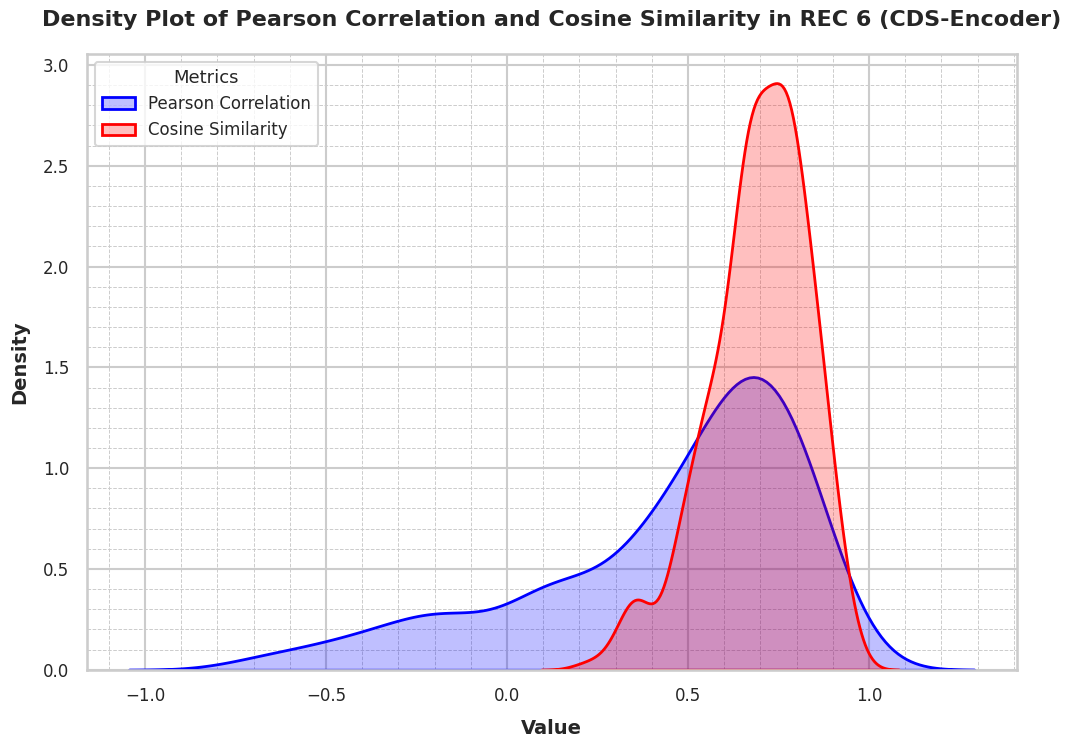

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df1 and df2 are already defined
# df1 = correlation_df
# df2 = cs
# Set the style and context for the plot
sns.set(style="whitegrid", context="talk")

# Create the plot
plt.figure(figsize=(12, 8))

# Plot density plot for df1
sns.kdeplot(df1['Correlation'], shade=True, label='Pearson Correlation', color='blue', linewidth=2)

# Plot density plot for df2
sns.kdeplot(df2['Cosine Similarity'], shade=True, label='Cosine Similarity', color='red', linewidth=2)

# Adding labels and title
plt.xlabel('Value', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Density', fontsize=14, fontweight='bold', labelpad=10)
plt.title('Density Plot of Pearson Correlation and Cosine Similarity in REC 6 (CDS-Encoder)', fontweight='bold', fontsize=16, pad=20)

# Customize the legend
plt.legend(loc='upper left', fontsize=12, title='Metrics', title_fontsize='13')

# Customize the grid and ticks
plt.grid(which='minor', linestyle='--', linewidth=0.7)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=10)

# Save the plot with high resolution
plt.savefig("images/cross/Best_density.png", dpi=500, bbox_inches='tight')

# Show the plot
plt.show()

/tmp/ipykernel_134220/746934162.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Correlation'], shade=True, label=corr_labels[i], color=colors[i], linewidth=2)


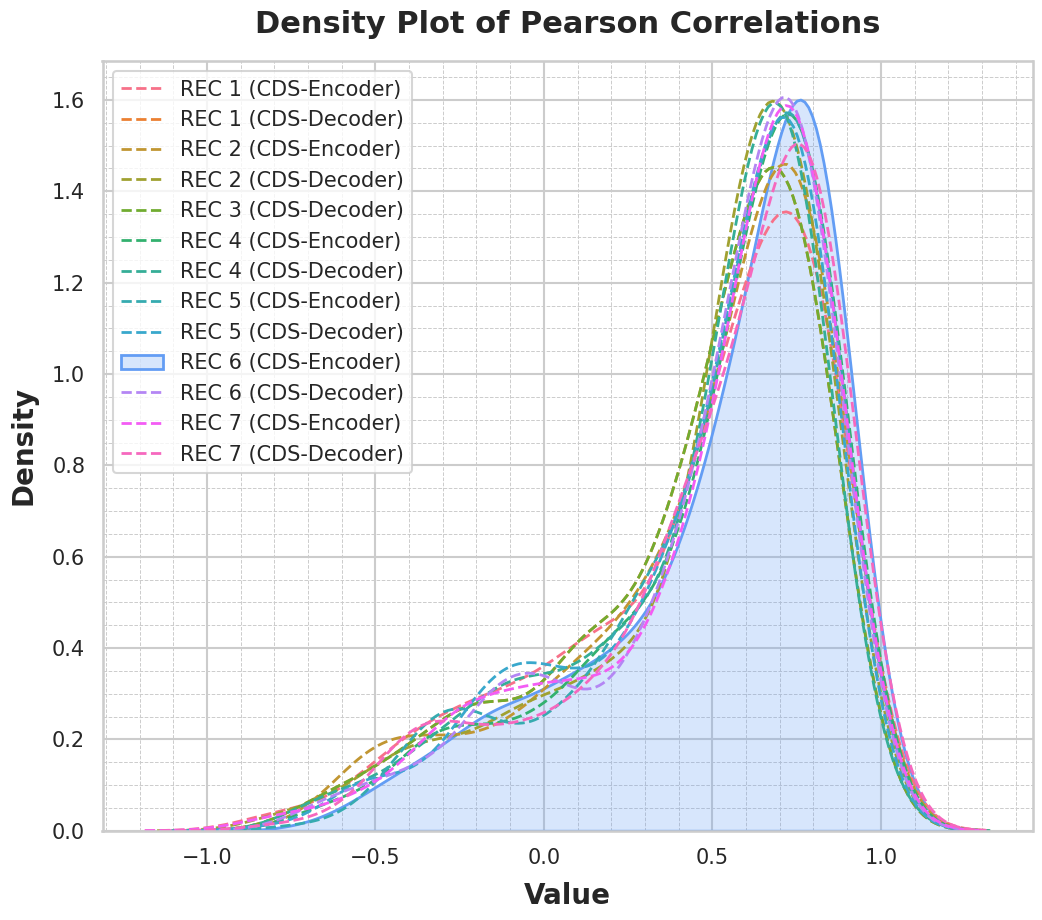

In [77]:
# Define labels for each dataframe
corr_labels = [
    "REC 1 (CDS-Encoder)", "REC 1 (CDS-Decoder)",
    "REC 2 (CDS-Encoder)", "REC 2 (CDS-Decoder)",
    "REC 3 (CDS-Decoder)", "REC 4 (CDS-Encoder)",
    "REC 4 (CDS-Decoder)", "REC 5 (CDS-Encoder)",
    "REC 5 (CDS-Decoder)", "REC 6 (CDS-Encoder)",
    "REC 6 (CDS-Decoder)", "REC 7 (CDS-Encoder)",
    "REC 7 (CDS-Decoder)"
]
cos_labels = corr_labels  # Assuming the same labels for cosine similarity for simplicity

# Set the style and context for the plot
sns.set(style="whitegrid", context="talk")

# Create the plot for Correlation
plt.figure(figsize=(12, 10))

# Define a list of colors for better differentiation
colors = sns.color_palette("husl", len(corr_dfs))

# Plot density plots for all correlation dataframes
for i, df in enumerate(corr_dfs):
    if i == 9:  # Index 9 corresponds to the 10th dataframe
        sns.kdeplot(df['Correlation'], shade=True, label=corr_labels[i], color=colors[i], linewidth=2)
    else:
        sns.kdeplot(df['Correlation'], label=corr_labels[i], color=colors[i], linestyle='--', linewidth=2)

# Adding labels and title
plt.xlabel('Value', fontsize=20, fontweight='bold', labelpad=10)
plt.ylabel('Density', fontsize=20, fontweight='bold', labelpad=10)
plt.title('Density Plot of Pearson Correlations', fontweight='bold', fontsize=22, pad=20)

# Customize the legend
plt.legend(loc='upper left', fontsize=15)

# Customize the grid and ticks
plt.grid(which='minor', linestyle='--', linewidth=0.7)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

# Save the plot with high resolution
plt.savefig("images/cross/Best_density_correlations.png", dpi=500, bbox_inches='tight')

# Show the plot
plt.show()

/tmp/ipykernel_134220/1432744625.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Cosine Similarity'], shade=True, label=cos_labels[i], color=colors[i], linewidth=2)


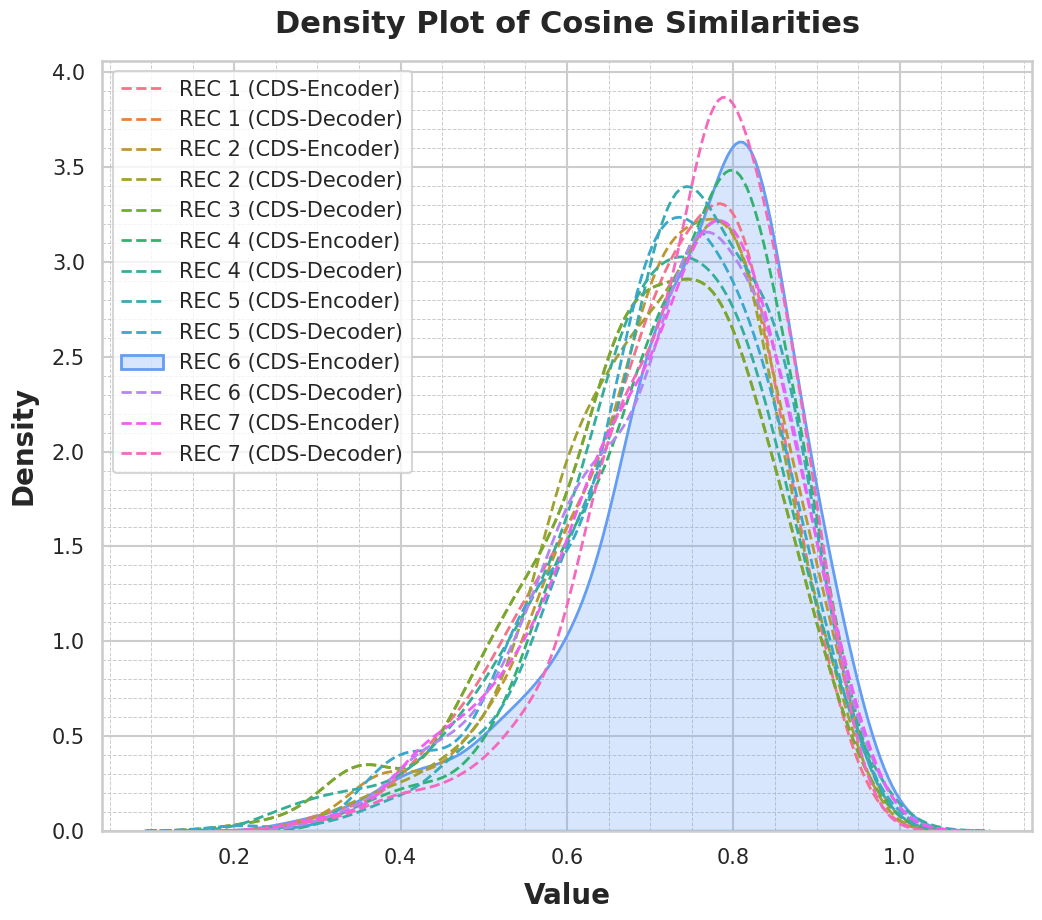

In [76]:
# Create the plot for Cosine Similarity
plt.figure(figsize=(12,10))

# Plot density plots for all cosine similarity dataframes
for i, df in enumerate(cos_dfs):
    if i == 9:  # Index 9 corresponds to the 10th dataframe
        sns.kdeplot(df['Cosine Similarity'], shade=True, label=cos_labels[i], color=colors[i], linewidth=2)
    else:
        sns.kdeplot(df['Cosine Similarity'], label=cos_labels[i], color=colors[i], linestyle='--', linewidth=2)

# Adding labels and title
plt.xlabel('Value', fontsize=20, fontweight='bold', labelpad=10)
plt.ylabel('Density', fontsize=20, fontweight='bold', labelpad=10)
plt.title('Density Plot of Cosine Similarities', fontweight='bold', fontsize=22, pad=20)

# Customize the legend
plt.legend(loc='upper left', fontsize=15)

# Customize the grid and ticks
plt.grid(which='minor', linestyle='--', linewidth=0.7)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

# Save the plot with high resolution
plt.savefig("images/cross/Best_density_cosine.png", dpi=500, bbox_inches='tight')

# Show the plot
plt.show()


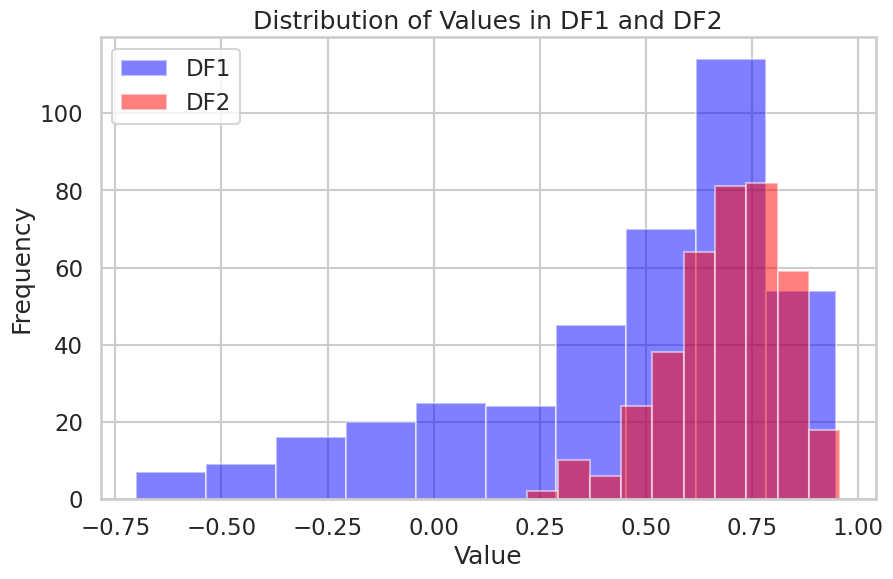

In [42]:

df1 = correlation_df
df2 = cs

# Plotting the distribution
plt.figure(figsize=(10, 6))

# Plot histogram for df1
plt.hist(df1['Correlation'], bins=10, alpha=0.5, label='DF1', color='blue')

# Plot histogram for df2
plt.hist(df2['Cosine Similarity'], bins=10, alpha=0.5, label='DF2', color='red')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Values in DF1 and DF2')
plt.legend()

# Show the plot
plt.show()

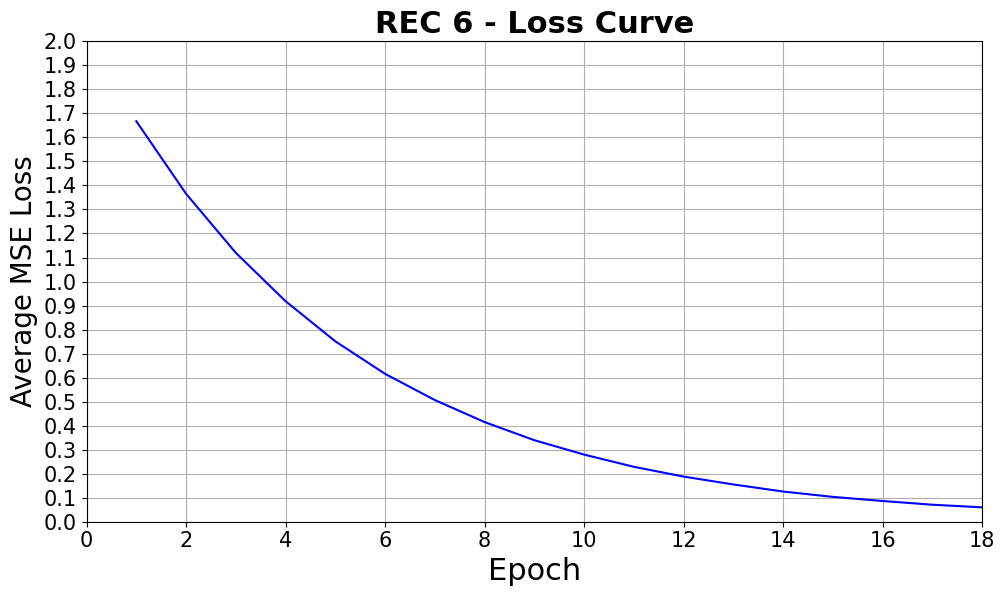

In [70]:
np.random.seed(42)  # For reproducibility
epochs = np.arange(1, 19)  # 18 epochs
mse_loss = 1.663 * np.exp(-0.2 * (epochs - 1)) + 0.004  # Exponential decay
noise = np.random.normal(0, 0.001, size=mse_loss.shape)  # Adding some noise
mse_loss_noisy = mse_loss + noise

# Plotting the MSE loss function with noise
plt.figure(figsize=(10, 6))
plt.plot(epochs, mse_loss_noisy, linestyle='-', color='b')
plt.title('REC 6 - Loss Curve',fontweight='bold', fontsize=22)
plt.xlabel('Epoch', fontsize=22)
plt.ylabel('Average MSE Loss', fontsize=20)
plt.grid(True)
plt.xticks(np.arange(0, 19, 2))
plt.yticks(np.linspace(0, 2, 21))
plt.xlim(0, 18)
plt.ylim(0, 2)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.savefig("images/cross/LOSS_REC6.png", dpi=500, bbox_inches='tight')
# Display the plot
plt.show()
